# Import libs

In [10]:
import pandas as pd
import numpy as np
from dmc.dmc import dmc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# Loading Vertebral Column 3C dataset

In [11]:
Xy = pd.read_csv('./datasets/vertebral_column_3C.dat', header=None, sep=' ', engine='python')

X = Xy.drop(Xy.columns[-1:], axis=1)
y = Xy[Xy.columns[-1]]

# Instantiating model

In [12]:
dmc_model = dmc(type_distance_calc='euclidean')

# Running the tests and computing informations

In [13]:
realizations = 20
hit_rate_list = []
std_dev = 0
confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    dmc_model.fit(X_train, y_train)

    hit_rate_list.append(dmc_model.score(X_test, y_test))

    y_pred = [dmc_model.predict(x) for x in X_test.values]

    confusion_matrix_list.append(confusion_matrix(y_test, y_pred))

std_dev = np.std(hit_rate_list)

# Showing informations computed

In [14]:
print('Hit rate:')
print(hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(hit_rate_list)/len(hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in confusion_matrix_list:
    print(matrix, end='\n')

Hit rate:
[0.8064516129032258, 0.7741935483870968, 0.7580645161290323, 0.7258064516129032, 0.8225806451612904, 0.7580645161290323, 0.7580645161290323, 0.8225806451612904, 0.7419354838709677, 0.8064516129032258, 0.8064516129032258, 0.7903225806451613, 0.7258064516129032, 0.7580645161290323, 0.7903225806451613, 0.7741935483870968, 0.7741935483870968, 0.8225806451612904, 0.7903225806451613, 0.8225806451612904]

Accuracy:
0.7814516129032258

Standard Deviation:
0.03080391815287787

Confusion Matrix:
[[ 3  1  0]
 [ 5 18  1]
 [ 0  5 29]]
[[10  3  0]
 [ 6 12  1]
 [ 1  3 26]]
[[10  0  0]
 [ 7 14  2]
 [ 2  4 23]]
[[12  2  0]
 [ 8 13  2]
 [ 2  3 20]]
[[10  2  0]
 [ 6 11  1]
 [ 2  0 30]]
[[14  4  0]
 [ 4 13  1]
 [ 1  5 20]]
[[13  7  0]
 [ 4 14  1]
 [ 3  0 20]]
[[11  2  0]
 [ 6 10  0]
 [ 0  3 30]]
[[ 6  2  0]
 [ 6 16  1]
 [ 2  5 24]]
[[ 9  2  0]
 [ 4 15  1]
 [ 4  1 26]]
[[14  4  0]
 [ 3 12  0]
 [ 2  3 24]]
[[10  3  0]
 [ 5 14  1]
 [ 0  4 25]]
[[12  3  0]
 [ 7 16  2]
 [ 2  3 17]]
[[11  1  0]
 [ 8  

# Choosing two columns from the last X_train and X_test to plot decision surface

In [15]:
X_train_2d, X_test_2d = X_train[X_train.columns[:2]], X_test[X_train.columns[:2]]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
         0      1
215  30.74  13.35
218  51.62  15.97
68   72.08  18.95
84   76.33  42.40
288  74.57  15.72
..     ...    ...
204  56.54  14.38
282  53.68  13.45
28   44.55  21.93
67   75.65  19.34
299  82.91  29.89

[248 rows x 2 columns]
Test dataset:
         0      1
96   96.66  19.46
241  51.53  13.52
106  65.01   9.84
21   54.92  21.06
194  72.64  18.93
..     ...    ...
246  46.64  15.85
245  47.81  10.69
221  54.95   5.87
140  69.56  15.40
206  95.48  46.55

[62 rows x 2 columns]


# Training the model with the new dataset 2d

In [16]:
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)

# Plotting decision surface

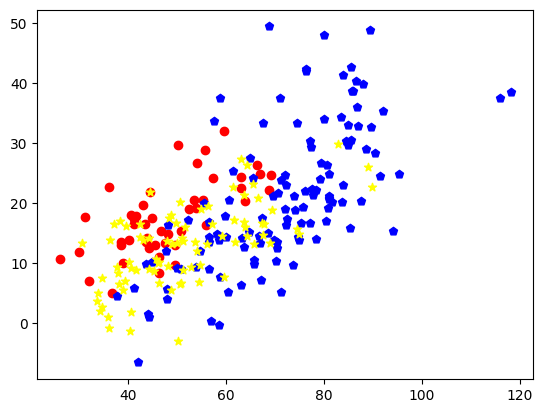

In [17]:
data = X_train_2d[:][:].values

x_ax = np.arange(data[:, 0].min(), data[:, 1].max())

dh = np.where(y_train == 'DH')
sl = np.where(y_train == 'SL')
no = np.where(y_train == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='blue', marker='p', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='yellow', marker='*', label='no')

plt.show()